In [25]:
import pandas as pd
from sklearn.utils import Bunch
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df = pd.read_csv("final_dataset3/fraudTest.csv")

In [27]:
df

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
555714,555714,2020-12-31 23:59:07,30560609640617,fraud_Reilly and Sons,health_fitness,43.77,Michael,Olson,M,558 Michael Estates,...,40.4931,-91.8912,519,Town planner,1966-02-13,9b1f753c79894c9f4b71f04581835ada,1388534347,39.946837,-91.333331,0
555715,555715,2020-12-31 23:59:09,3556613125071656,fraud_Hoppe-Parisian,kids_pets,111.84,Jose,Vasquez,M,572 Davis Mountains,...,29.0393,-95.4401,28739,Futures trader,1999-12-27,2090647dac2c89a1d86c514c427f5b91,1388534349,29.661049,-96.186633,0
555716,555716,2020-12-31 23:59:15,6011724471098086,fraud_Rau-Robel,kids_pets,86.88,Ann,Lawson,F,144 Evans Islands Apt. 683,...,46.1966,-118.9017,3684,Musician,1981-11-29,6c5b7c8add471975aa0fec023b2e8408,1388534355,46.658340,-119.715054,0
555717,555717,2020-12-31 23:59:24,4079773899158,fraud_Breitenberg LLC,travel,7.99,Eric,Preston,M,7020 Doyle Stream Apt. 951,...,44.6255,-116.4493,129,Cartographer,1965-12-15,14392d723bb7737606b2700ac791b7aa,1388534364,44.470525,-117.080888,0


In [28]:
data = Bunch(dat=[], target=[], feature_names=[], target_names=[])

In [29]:
def create_bunch():
    data.feature_names.append('amt')
    data.feature_names.append('zip')
    data.feature_names.append('lat')
    data.feature_names.append('long')
    data.feature_names.append('city_pop')
    data.feature_names.append('merch_lat')
    data.feature_names.append('merch_long')
    data.target_names.append('fraud') 
    data.target_names.append('not fraud') 
    
    for i in range(df.shape[0]):
        key = []
        key.append(df.iloc[i]['amt'])
        key.append(df.iloc[i]['zip'])
        key.append(df.iloc[i]['lat'])
        key.append(df.iloc[i]['long'])
        key.append(df.iloc[i]['city_pop'])
        key.append(df.iloc[i]['merch_lat'])
        key.append(df.iloc[i]['merch_long'])
        
        data.dat.append(key)
        #data.dat = np.append(data.dat, [key])
        data.target.append(1 if df.iloc[i]['is_fraud'] else 0)

In [30]:
create_bunch()

In [31]:
data.dat = np.array(data.dat)

In [32]:
data.dat

array([[ 2.86000000e+00,  2.92090000e+04,  3.39659000e+01, ...,
         3.33497000e+05,  3.39863910e+01, -8.12007140e+01],
       [ 2.98400000e+01,  8.40020000e+04,  4.03207000e+01, ...,
         3.02000000e+02,  3.94504980e+01, -1.09960431e+02],
       [ 4.12800000e+01,  1.17100000e+04,  4.06729000e+01, ...,
         3.44960000e+04,  4.04958100e+01, -7.41961110e+01],
       ...,
       [ 8.68800000e+01,  9.93230000e+04,  4.61966000e+01, ...,
         3.68400000e+03,  4.66583400e+01, -1.19715054e+02],
       [ 7.99000000e+00,  8.36430000e+04,  4.46255000e+01, ...,
         1.29000000e+02,  4.44705250e+01, -1.17080888e+02],
       [ 3.81300000e+01,  7.30340000e+04,  3.56665000e+01, ...,
         1.16001000e+05,  3.62100970e+01, -9.70363720e+01]])

In [33]:
data.feature_names

['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

In [34]:
data.target_names

['fraud', 'not fraud']

In [74]:
data.target = np.reshape(data.target, (1,-1))[0]
print(data.target)
data.target_names = np.reshape(data.target_names, (1,-1))[0]
print(data.target_names)

[0 0 0 ... 0 0 0]
['fraud' 'not fraud']


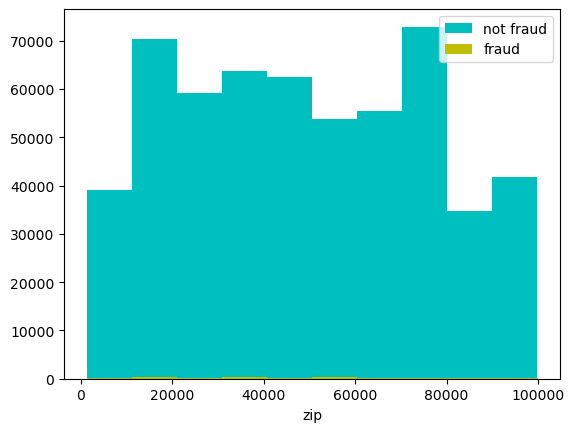

In [75]:
#Histograms of Zip
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 1 
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

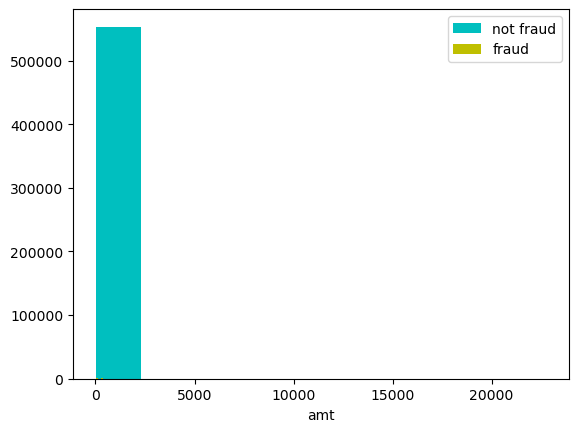

In [76]:
#Histograms of AMT
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 0 
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

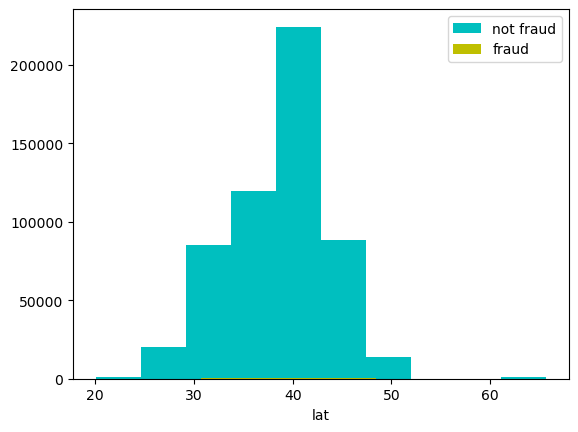

In [77]:
#Histograms of lat
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 2 #picks the third column of features
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

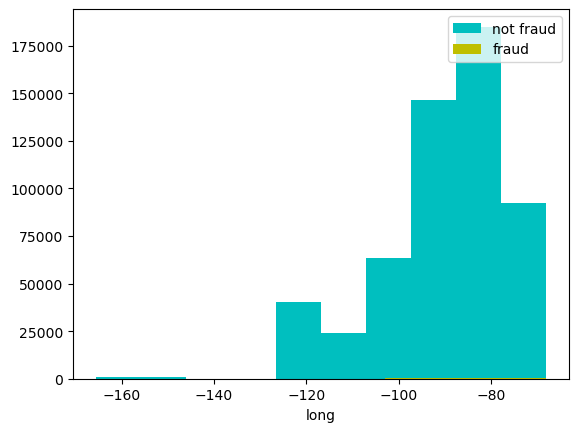

In [62]:
#Histograms of long
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 3 #picks the third column of features
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target[0]==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

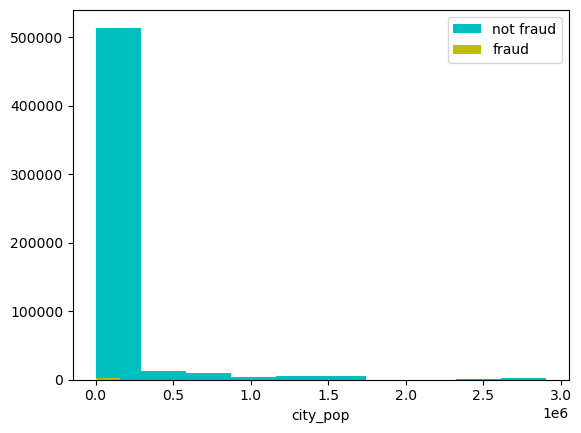

In [78]:
#Histograms of city_pop
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 4 #picks the third column of features
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

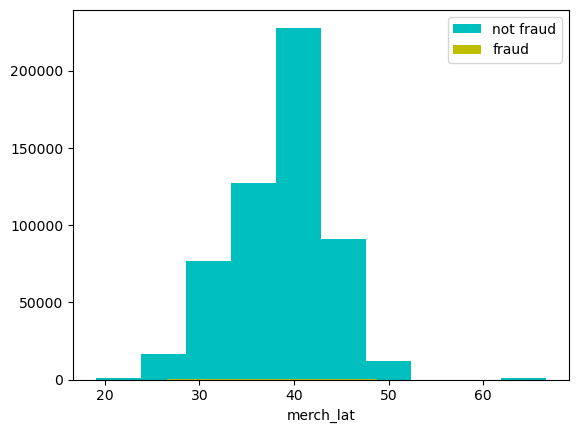

In [79]:
#Histograms of merch_lat
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 5 #picks the third column of features
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

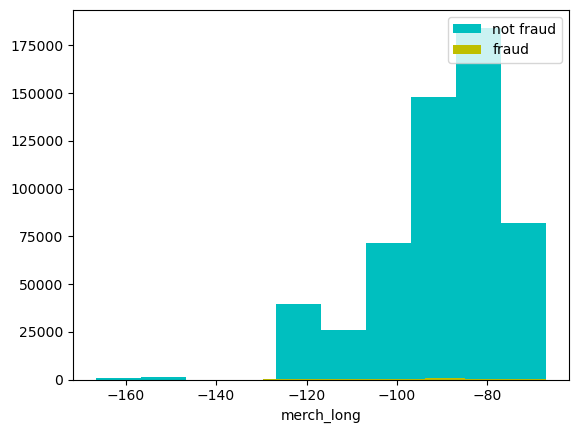

In [80]:
#Histograms of merch_long
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

fig, ax = plt.subplots()
x_index = 6 #picks the third column of features
colors = ['c', 'y']

for label, color in zip(range(len(data.target_names)), colors):
    ax.hist(data.dat[data.target==label, x_index], 
            label=data.target_names[1-label],
            color=color)

ax.set_xlabel(data.feature_names[x_index])
ax.legend(loc='upper right')
plt.show()

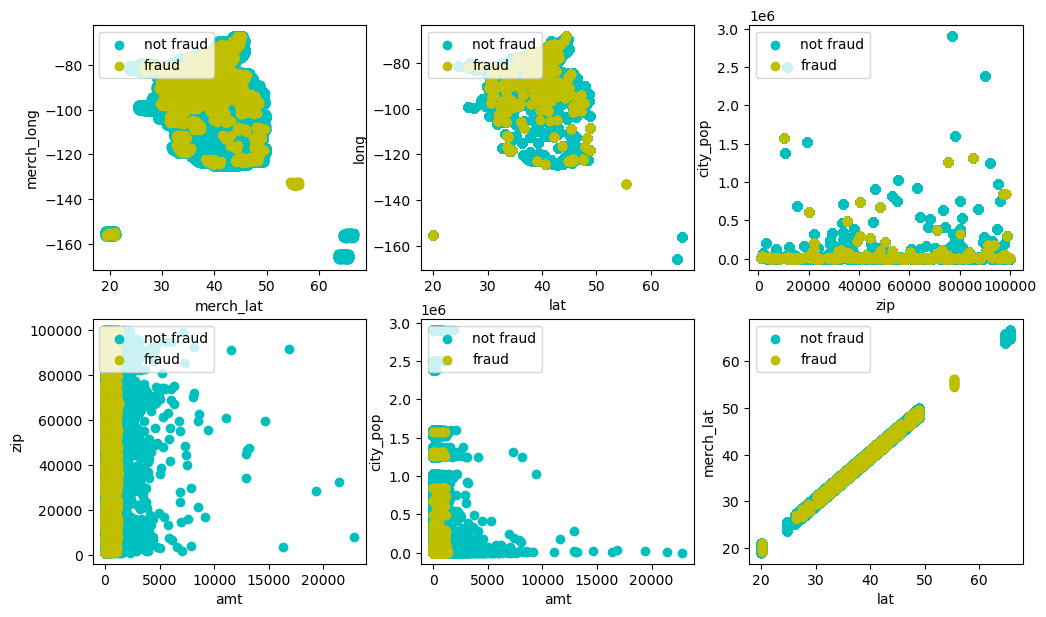

In [81]:
# Scatterplots
#['amt', 'zip', 'lat', 'long', 'city_pop', 'merch_lat', 'merch_long']

#create six subplots using axs is a 2D NumPy array  
fig, axs = plt.subplots(2, 3, figsize=(12,7))

colors = ['c', 'y']

rows=[0,1]
cols=[0,1,2]

# create feature pairs for scatterplots
xy_pairs=[[5, 6], [2, 3], [1, 4],[0, 1], [0, 4], [2, 5]]
xy_index=0

for i in rows:
    for j in cols: 
        
        x_index = xy_pairs[xy_index][0]
        y_index = xy_pairs[xy_index][1]
        
        xy_index+=1

        for label, color in zip(range(len(data.target_names)), colors):
            axs[i,j].scatter(data.dat[data.target==label, x_index], 
                        data.dat[data.target==label, y_index],
                        label=data.target_names[1-label],
                        c=color)

        axs[i,j].set_xlabel(data.feature_names[x_index])
        axs[i,j].set_ylabel(data.feature_names[y_index])
        axs[i,j].legend(loc='upper left')


plt.subplots_adjust(wspace=0.2, hspace=0.2) #format subplots 
plt.show()